In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

import xgboost as xgb

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
import csv

#load the preprocessed data
X_train = pd.read_csv("X_train_multi.csv")
X_test = pd.read_csv("X_test_multi.csv")
y_train = pd.read_csv("y_train_multi.csv").squeeze()
y_test = pd.read_csv("y_test_multi.csv").squeeze()

num_classes = 11

In [2]:
#define xgboost model for multiclass classification
xgb_multi_best = xgb.XGBClassifier(
    device='cuda',  # keep using GPU if available
    objective='multi:softmax', # use softmax for multiclass classification
    num_class=num_classes, # specify the number of classes
    random_state=42,
    learning_rate=np.float64(0.29156581270472504),
    max_depth=3,
    n_estimators=1265,
    subsample=np.float64(0.8437692474329741)
)

start_time = time.perf_counter()

#train the model on the training data
xgb_multi_best.fit(X_train, y_train)

end_time = time.perf_counter()

training_time = end_time - start_time
print(f"\nTraining (convergence) time: {training_time} seconds")


Training (convergence) time: 120.494117000002 seconds


In [4]:
#predict on the test set
y_pred = xgb_multi_best.predict(X_test)

In [5]:
#calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

Accuracy: 0.9999584945659808
Recall: 0.9754753875568057
Precision: 0.9928079436352177
F1 Score: 0.9821302676105707


In [6]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    242754
           1       1.00      1.00      1.00      9676
           2       1.00      1.00      1.00      9331
           3       1.00      1.00      1.00     34296
           4       1.00      1.00      1.00     14377
           5       1.00      1.00      1.00      2094
           6       1.00      1.00      1.00       558
           7       0.99      1.00      0.99        83
           8       1.00      0.73      0.84        26
           9       0.93      1.00      0.97        14
          10       1.00      1.00      1.00         3

    accuracy                           1.00    313212
   macro avg       0.99      0.98      0.98    313212
weighted avg       1.00      1.00      1.00    313212



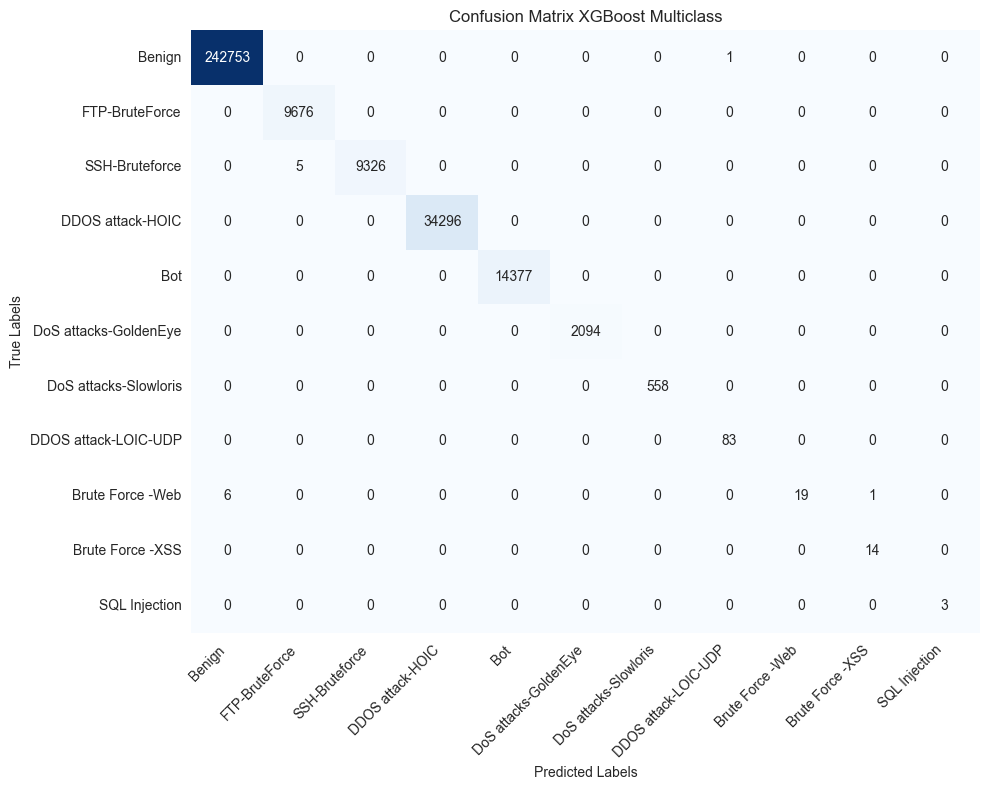

In [7]:
labels = [
    'Benign',
    'FTP-BruteForce',
    'SSH-Bruteforce',
    'DDOS attack-HOIC',
    'Bot',
    'DoS attacks-GoldenEye',
    'DoS attacks-Slowloris',
    'DDOS attack-LOIC-UDP',
    'Brute Force -Web',
    'Brute Force -XSS',
    'SQL Injection'
]

# Compute confusion matrix with string labels
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix XGBoost Multiclass')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
#export results
#export xgb_multi_best results
results_list = ["xgb_multi", training_time, accuracy, recall, precision, f1, None, None, None, None, None, None]
file_path = 'results.csv'

# Check if the file exists to avoid duplicate headers
file_exists = os.path.isfile(file_path)

# Open and write to the file
with open(file_path, mode='a', newline='') as file:
    writer = csv.writer(file)
    # Write the data row
    writer.writerow(results_list)